# 20News_FNMF

In [24]:
import numpy as np
import pandas as pd
from __future__ import print_function
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
# Standars Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import NMF
from numpy import linalg as LA
%matplotlib inline
from sklearn.decomposition import TruncatedSVD

In [36]:
n_features = 1000
n_top_words = 10
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))

In [18]:
# Groups of various sizes and ranks
m1 = 2000; m2 = 1000; m3 = 500
d1 = 3; d2 = 3; d3 = 6

id_A = range(0,m1)
id_B = range(m1,m1+m2)
id_C = range(m1+m2,m1+m2+m3)

id_all = [id_A, id_B, id_C]
print(id_A, id_B, id_C)

str_A = "Large size low rank"
str_B = "Medium size low rank"
str_C = "Small size high rank"

(8500,)
range(0, 2000) range(2000, 3000) range(3000, 3500)


In [29]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                             stop_words='english')

X =  vectorizer.fit_transform(dataset.data[0:m1+m2+m3])
X1 = vectorizer.fit_transform(dataset.data[:m1])
X2 = vectorizer.fit_transform(dataset.data[m1:m1+m2])
X3 = vectorizer.fit_transform(dataset.data[m1+m2:m1+m2+m3])

print(X.shape, X1.shape, X2.shape, X3.shape)

X_fnmf = [X1, X2, X3]

(3500, 1000) (2000, 1000) (1000, 1000) (500, 1000)


In [46]:
I = range(1,20)
IT = 1

def group_topic(X):
    for itr in range(IT):
        print(itr)

        for ell in I:
            model = NMF(n_components=ell, max_iter = 2000, solver='mu', init="random")
            model.fit(X)
            W = model.transform(X)
            H = model.components_

        feature_names = vectorizer.get_feature_names_out()
        for topic_idx, topic in enumerate(model.components_):
            print("Topic #%d:" % topic_idx)
            print(" ".join([feature_names[i]
                for i in topic.argsort()[:-n_top_words - 1:-1]]))
            print()
            
print("The top 10 topic for group1 is: ")group_topic(X1)
group_topic(X2)
group_topic(X3)

0
Topic #0:
limits comes completely line fast history record services private phone

Topic #1:
face standard users shipping left handguns oil monitor known clearly

Topic #2:
windows goals essentially god reading random possession version screen exist

Topic #3:
likely translation test escrow xterm research information wondering nice mean

Topic #4:
examples existence imagine energy gov random model purposes serdar day

Topic #5:
manufacturers stated escrow message lives mhz tracking trial mother way

Topic #6:
space cities pretty build waco considered method voice crime excellent

Topic #7:
constant maybe title board team talk japan jews research dead

Topic #8:
towers lives engines armenian monitor insurance knowledge later bad faq

Topic #9:
usually wants hi particularly window version stuff purposes talk enforcement

Topic #10:
traffic escrow particularly force quite win yes capable nj hi

Topic #11:
saw lots men hours history did weaver make security escrow

Topic #12:
00 10 secon

In [41]:
I = range(1,20)
IT = 3
LOSSES_V = np.zeros((IT,len(I)))
LOSSES_A_V = np.zeros((IT,len(I)))
LOSSES_B_V = np.zeros((IT,len(I)))
LOSSES_C_V = np.zeros((IT,len(I)))

for itr in range(IT):
    print(itr)
    
    loss = []
    lossA = []
    lossB = []
    lossC = []
    
    for ell in I:
        model = NMF(n_components=ell, max_iter = 2000, solver='mu', init="random")
        model.fit(X)
            
        W = model.transform(X)
        H = model.components_

        Xhat = W@H
        loss.append(LA.norm(X-Xhat, 'fro')/(X.shape[0]))

        Ahat = W[id_A,:]@H
        lossA.append(LA.norm(X[id_A,:]-Ahat, 'fro')**2/(len(id_A)))

        Bhat = W[id_B,:]@H
        lossB.append(LA.norm(X[id_B,:]-Bhat, 'fro')**2/(len(id_B)))

        Chat = W[id_C,:]@H
        lossC.append(LA.norm(X[id_C,:]-Chat, 'fro')**2/(len(id_C)))
    
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
            for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
   
    LOSSES_V[itr,:] = np.asarray(loss)
    LOSSES_A_V[itr,:] = np.asarray(lossA)
    LOSSES_B_V[itr,:] = np.asarray(lossB)
    LOSSES_C_V[itr,:] = np.asarray(lossC)

0
Topic #0:
heaven liar car form committed commercial comments came manuals committee

Topic #1:
present hi satellite living search ensure pressure did hole towers

Topic #2:
trace ensure hello race paid roads display reports purpose news

Topic #3:
contains issue mean systems caught body subcommittee modes thought lebanon

Topic #4:
likely ensure trade wants reports way telephone network won war

Topic #5:
expected space lebanon guns didn useful offered display set body

Topic #6:
sanderson engine memory lots easy moon details secret homosexuals way

Topic #7:
limits comes uses fact congress hi line previous directory reason

Topic #8:
handgun theory year handguns probably sense process interested willing capable

Topic #9:
told modes articles initial kind living face kingman message large

Topic #10:
video help service including turbo information uiuc hello capable ensure

Topic #11:
enforcement living base ran network reply work parallel type criminal

Topic #12:
gets getting race g

In [33]:
AVG_A_V = np.mean(LOSSES_A_V, axis = 0)
STD_A_V = np.std(LOSSES_A_V, axis = 0)

AVG_B_V = np.mean(LOSSES_B_V, axis = 0)
STD_B_V = np.std(LOSSES_B_V, axis = 0)

AVG_C_V = np.mean(LOSSES_C_V, axis = 0)
STD_C_V = np.std(LOSSES_C_V, axis = 0)

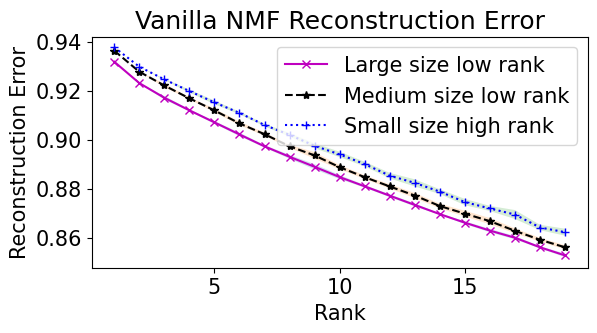

In [35]:
plt.rcParams.update({'font.size': 15})
plt.figure().set_figheight(3)
plt.plot(I, AVG_A_V, "x-m", label=str_A)
plt.plot(I, AVG_B_V, "*--k", label=str_B)
plt.plot(I, AVG_C_V, "+:b", label=str_C)
plt.xlabel("Rank")
plt.ylabel("Reconstruction Error")
plt.title("Vanilla NMF Reconstruction Error")
plt.fill_between(I, AVG_A_V-STD_A_V, AVG_A_V+STD_A_V, alpha=0.2)
plt.fill_between(I, AVG_B_V-STD_B_V, AVG_B_V+STD_B_V, alpha=0.2)
plt.fill_between(I, AVG_C_V-STD_C_V, AVG_C_V+STD_C_V, alpha=0.2)
plt.legend()
plt.show()